In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

uploaded = files.upload()

df = pd.read_csv("Titanic.csv")

print("Shape:", df.shape)
display(df.head())

print("\nColumns:")
print(df.columns.tolist())

print("\nMissing values per column:")
print(df.isnull().sum())


Saving Titanic.csv to Titanic.csv
Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [2]:
data = df.copy()

data.drop(columns=["Name", "Ticket"], inplace=True)

data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

X = data.drop("Survived", axis=1)
y = data["Survived"]

print("Independent variables shape:", X.shape)
print("Dependent variable shape:", y.shape)

display(X.head())
print("\nTarget values:")
display(y.head())

Independent variables shape: (891, 9)
Dependent variable shape: (891,)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,0,22.0,1,0,7.2500,NaN,0.0
1,2,1,1,38.0,1,0,71.2833,C85,1.0
2,3,3,1,26.0,0,0,7.9250,NaN,0.0
3,4,1,1,35.0,1,0,53.1000,C123,0.0
4,5,3,0,35.0,0,0,8.0500,NaN,0.0



Target values:


,Survived
0,0
1,1
2,1
3,1
4,0


In [3]:
X["Age_cat"] = pd.cut(
    X["Age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=["Child", "Teen", "Young", "Adult", "Senior"]
)

X["Fare_cat"] = pd.cut(
    X["Fare"],
    bins=[-1, 7.91, 14.45, 31, 1000],
    labels=["Low", "Mid", "High", "VeryHigh"]
)

X.drop(columns=["Age", "Fare"], inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X["Age_cat"] = le.fit_transform(X["Age_cat"])
X["Fare_cat"] = le.fit_transform(X["Fare_cat"])

print("Continuous features converted to categorical")
display(X.head())


Continuous features converted to categorical


,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Age_cat,Fare_cat
0,1,3,0,1,0,NaN,0.0,4,1
1,2,1,1,1,0,C85,1.0,0,3
2,3,3,1,0,0,NaN,0.0,4,2
3,4,1,1,1,0,C123,0.0,4,3
4,5,3,0,0,0,NaN,0.0,4,2


In [4]:
from sklearn.model_selection import train_test_split

print("Missing values before handling:")
print(X.isnull().sum())

for col in ["Age", "Fare"]:
    if col in X.columns:
        X[col].fillna(X[col].median(), inplace=True)

if "Embarked" in X.columns:
    X["Embarked"].fillna(X["Embarked"].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(X.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Missing values before handling:
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Parch            0
Cabin          687
Embarked         2
Age_cat          0
Fare_cat         0
dtype: int64

Missing values after handling:
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Parch            0
Cabin          687
Embarked         0
Age_cat          0
Fare_cat         0
dtype: int64

Shapes:
X_train: (712, 9)
X_test: (179, 9)
y_train: (712,)
y_test: (179,)


/tmp/ipython-input-3932691564.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Embarked"].fillna(X["Embarked"].mode()[0], inplace=True)


In [5]:
for dataset in [X, X_train, X_test]:
    if "Cabin" in dataset.columns:
        dataset.drop(columns=["Cabin"], inplace=True)

print("Cabin column removed completely.")
print("Final feature columns:", X.columns.tolist())

Cabin column removed completely.
Final feature columns: ['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_cat', 'Fare_cat']


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt.fit(X_train, y_train)

print("Baseline Decision Tree trained successfully")

Baseline Decision Tree trained successfully


In [7]:
from sklearn.metrics import accuracy_score

depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

results = pd.DataFrame({
    "max_depth": depths,
    "train_accuracy": train_acc,
    "test_accuracy": test_acc
})

display(results)

,max_depth,train_accuracy,test_accuracy
0,1,0.787921,0.782123
1,2,0.792135,0.765363
2,3,0.816011,0.793296
3,4,0.820225,0.782123
4,5,0.834270,0.770950
5,6,0.846910,0.776536
6,7,0.877809,0.776536
7,8,0.887640,0.787709
8,9,0.898876,0.782123
9,10,0.914326,0.765363


In [8]:
split_values = [2, 5, 10, 20, 50]
leaf_values = [1, 2, 5, 10, 20]

split_acc = []
leaf_acc = []

for s in split_values:
    model = DecisionTreeClassifier(
        criterion="entropy",
        min_samples_split=s,
        random_state=42
    )
    model.fit(X_train, y_train)
    split_acc.append(accuracy_score(y_test, model.predict(X_test)))

for l in leaf_values:
    model = DecisionTreeClassifier(
        criterion="entropy",
        min_samples_leaf=l,
        random_state=42
    )
    model.fit(X_train, y_train)
    leaf_acc.append(accuracy_score(y_test, model.predict(X_test)))

results_split = pd.DataFrame({
    "min_samples_split": split_values,
    "test_accuracy": split_acc
})

results_leaf = pd.DataFrame({
    "min_samples_leaf": leaf_values,
    "test_accuracy": leaf_acc
})

print("Effect of min_samples_split:")
display(results_split)

print("\nEffect of min_samples_leaf:")
display(results_leaf)


Effect of min_samples_split:


,min_samples_split,test_accuracy
0,2,0.759777
1,5,0.743017
2,10,0.748603
3,20,0.759777
4,50,0.793296



Effect of min_samples_leaf:


,min_samples_leaf,test_accuracy
0,1,0.759777
1,2,0.726257
2,5,0.765363
3,10,0.793296
4,20,0.793296


<h3>بررسی تأثیر پارامترهای min_samples_split و min_samples_leaf</h3>

<p>
پارامتر <b>min_samples_split</b> حداقل تعداد نمونه‌های لازم برای شکستن یک گره را مشخص می‌کند.
با افزایش مقدار این پارامتر، درخت تصمیم از ایجاد شاخه‌های عمیق جلوگیری می‌کند و مدل ساده‌تر می‌شود.
در نتیجه، مقدارهای بزرگ‌تر از overfitting جلوگیری می‌کنند اما ممکن است باعث underfitting شوند.
</p>

<p>
پارامتر <b>min_samples_leaf</b> حداقل تعداد نمونه‌هایی را که باید در هر برگ وجود داشته باشد تعیین می‌کند.
افزایش این مقدار باعث می‌شود برگ‌ها شامل داده‌های بیشتری باشند که منجر به تعمیم بهتر مدل می‌شود
و از یادگیری نویزهای داده جلوگیری می‌کند.
</p>

<p>
به طور کلی، هر دو پارامتر نقش مهمی در کنترل پیچیدگی درخت تصمیم دارند و با تنظیم مناسب آن‌ها
می‌توان تعادل خوبی بین دقت مدل و توانایی تعمیم برقرار کرد.
</p>

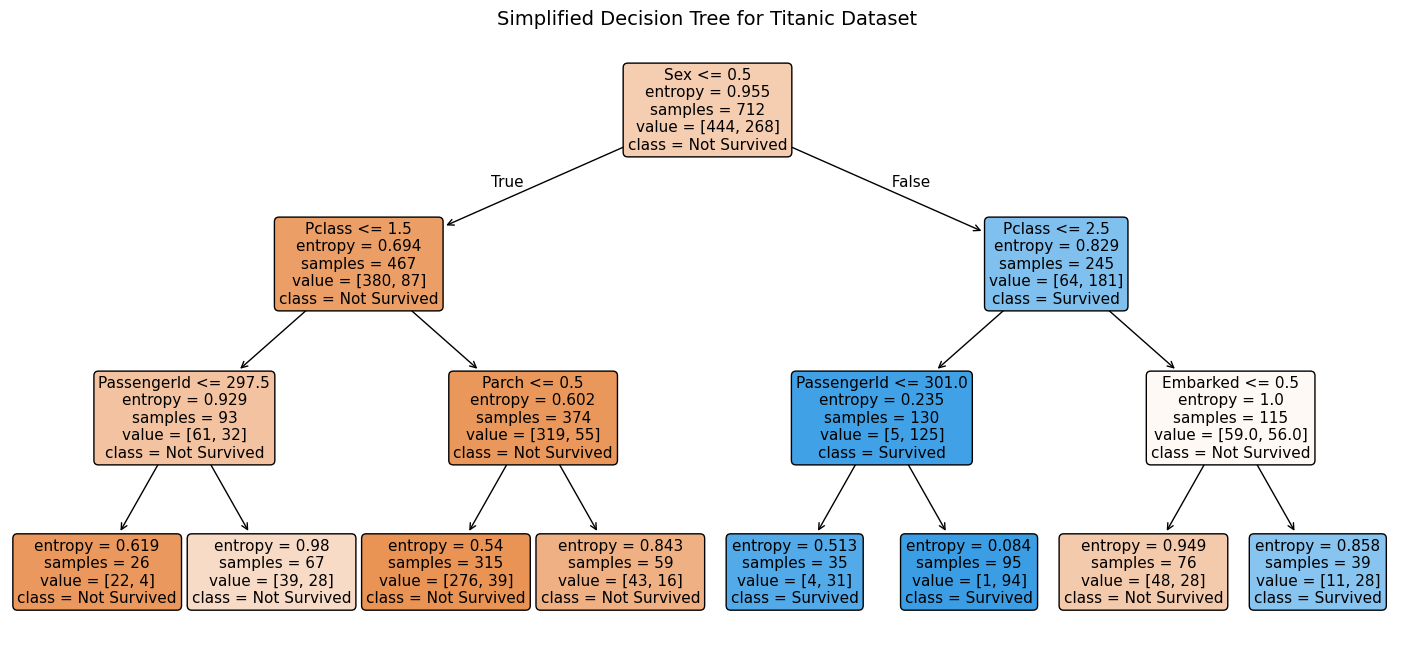

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_vis = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    min_samples_leaf=20,
    random_state=42
)

dt_vis.fit(X_train, y_train)

# Plot
plt.figure(figsize=(18, 8))
plot_tree(
    dt_vis,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    fontsize=11
)

plt.title("Simplified Decision Tree for Titanic Dataset", fontsize=14)
plt.show()
